# K Means on IRIS dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [4]:
iris = pd.read_csv('Iris.csv', index_col=0)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data visualization

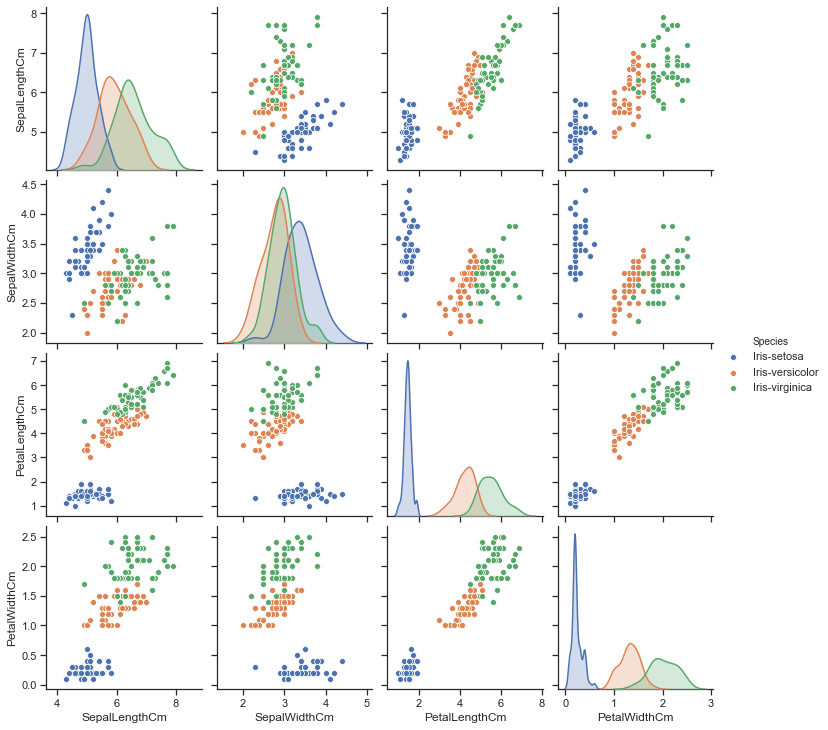

In [7]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue="Species")

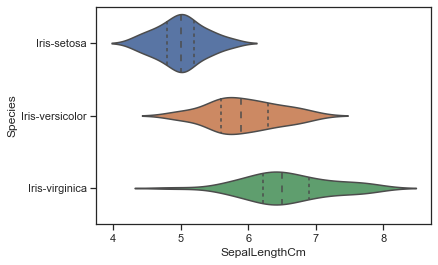

In [15]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()


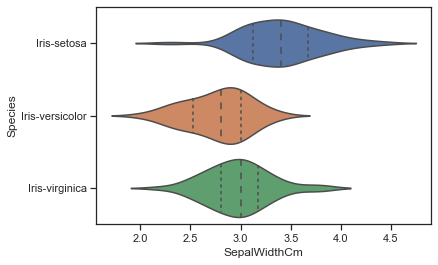

In [14]:
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()


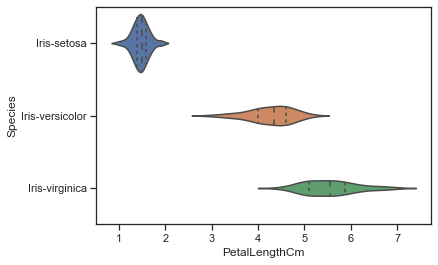

In [13]:
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()


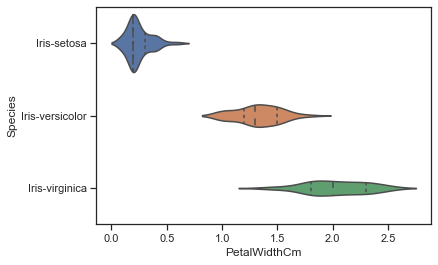

In [12]:
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

## K Means

In [17]:
y = iris['Species']

X = iris.drop(columns='Species')

In [18]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
y_pred = model.predict(X)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [20]:
x = iris['PetalLengthCm']
y = iris['PetalWidthCm']


In [21]:
centroid_plcm = model.cluster_centers_[:,2]
centroid_pwcm = model.cluster_centers_[:,3]

In [22]:
labels_en = LabelEncoder().fit_transform(y)

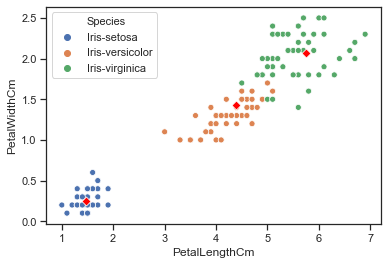

In [23]:
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue="Species")
sns.scatterplot(x=centroid_plcm, y=centroid_pwcm, marker='D', s=40, c=['red'])

In [24]:
df = pd.DataFrame({'labels': y_pred, 'species': iris['Species']})

ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                 50                0               0
1                  0               48              14
2                  0                2              36


[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.53558205128205, 38.964787851037855, 34.19068792479662, 29.87991975437056, 28.258291686383792, 26.511101010101015]


Text(0, 0.5, 'intertia')

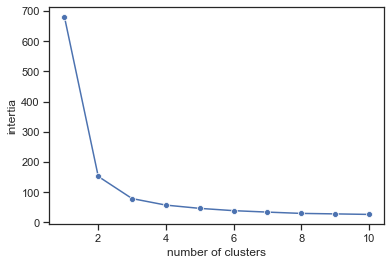

In [25]:
n_comps = 10
inertias = []

for i in range(1,n_comps+1):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

print(inertias)
lplot = sns.lineplot(x=np.arange(1,n_comps+1), y=inertias, marker='o')
lplot.set_xlabel('number of clusters')
lplot.set_ylabel('intertia')

In [28]:
# K is 3 cluster  